In [1]:
from qdtuner import SingleQuantumDotTuner

In [2]:
QDTuner = SingleQuantumDotTuner(
    device_config='../device_config.yml',
    station_config='../station_config.yml',
    tuner_config='../tuner_config.yml',
    qcodes_config='../qcodes_config.yml',
    save_dir='C:\\Users\\coher\\Desktop\\Andrija'
)


Connecting to station ... 
Connected to: HEWLETT-PACKARD 34401A (serial:0, firmware:11-5-3) in 0.19s
Connected to: Stanford_Research_Systems SIM900 (serial:s/n130900, firmware:ver3.6) in 1.63s
done!
Grounding device ...  done!
Creating/initializing a database at C:\Users\coher\Desktop\Andrija\N44_D54_2024-05-08\experiments_N44_D54_2024-05-08.db ...  done!
Creating/initializing the experiment in the database ...  done!
Copying all of the config.yml files to the new directory ...  done!


Starting experimental run with id: 48. 


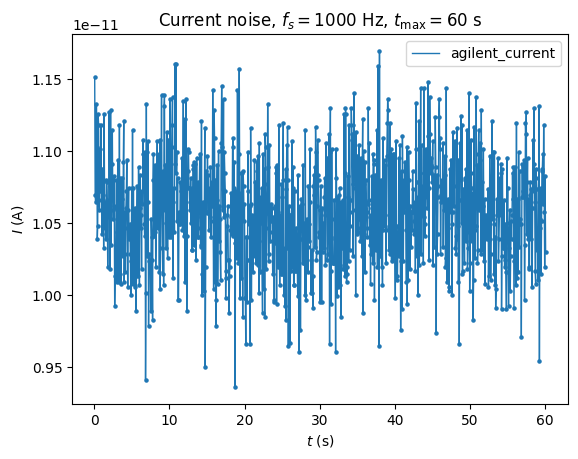

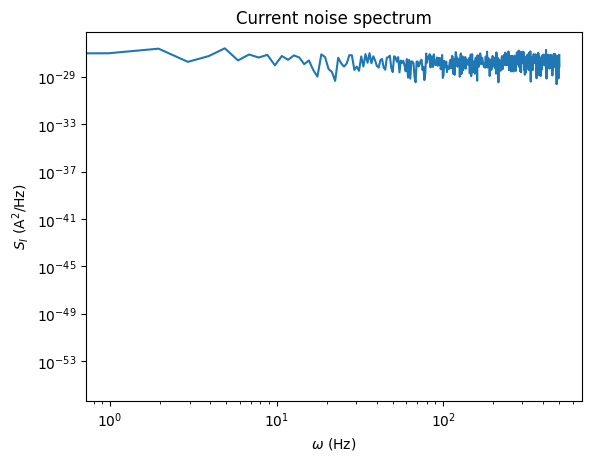

In [5]:
QDTuner.current_trace(f_sampling=1000, t_capture=60)

In [ ]:
QDTuner.bias_ohmic(ohmic='S', V=0.005) # 0.5 mV

In [ ]:
# Set maxV equal to None if you want to sweep 
# up to the max voltage you set in device config
# It'll stop if it hits max current or max gate voltage defined in device_config.yml (it should)
QDTuner.turn_on_device(minV=1, maxV=None, dV=0.05)

In [ ]:
# Set maxV equal to None if you want to use
# saturation voltage found in turn on phase.
QDTuner.pinch_off_device(gates=['STL'], minV=None, maxV=None, dV=0.005)

In [ ]:
# B1 is outer, B2 is inner loop
QDTuner.sweep_barriers(B1='LB', B2='RB', voltage_configuration={}, dV=0.002)

In [ ]:
QDTuner.coulomb_blockade(P='P', P_bounds=(0,0.75), voltage_configuration={'S': 0.005, 'LB': 0.55, 'RB': 0.7}, dV=0.005)

In [ ]:
QDTuner.coulomb_diamonds(ohmic='S', 
                         gate='P', 
                         S_bounds=(-0.015, 0.015),
                         gate_bounds=(0,0.75),
                         voltage_configuration={'LB': 0.55, 'RB': 0.7},
                         dV_gate=0.003, 
                         dV_ohmic=0.001)

In [ ]:
QDTuner._zero_device()

# DATABASE VIEWER

In [ ]:
db_file = "C:\\Users\\coher\\experiments_2024-04-27.db"
import IPython.lib.backgroundjobs as bg
from plottr.apps import inspectr

jobs = bg.BackgroundJobManager()
jobs.new(inspectr.main, db_file)

In [ ]:
import qcodes as qc
qc.dataset.initialise_or_create_database_at(db_file)
tutorial_exp = qc.dataset.load_or_create_experiment(
    experiment_name="Initialization",
    sample_name="N44_D54"
)
dataset = qc.dataset.load_by_run_spec(experiment_name='Initialization', captured_run_id=1)
